In [1]:
%%capture
# Compile and import local pyrossgeo module
import os, sys
owd = os.getcwd()
os.chdir('../../')
sys.path.insert(0,'../../')
!python setup.py build_ext --inplace
os.chdir(owd)

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pyrossgeo

import pandas as pd
import json

Simulation parameters

In [2]:
model_path = 'model.json' 
commuter_networks_path = 'commuter_networks.csv'
node_parameters_path = 'node_parameters.csv'
cnode_parameters_path = 'cnode_parameters.csv' 
contact_matrices_path = 'contact_matrices.json' 
node_cmatrices_path = 'node_cmatrices.csv' 
cnode_cmatrices_path = 'cnode_cmatrices.csv' 
node_positions_path = 'node_positions.csv' 
node_populations_path = 'node_populations.csv' 

Simulation settings

In [3]:
t_start = 0
t_end = 24*60*100

_, dts = pyrossgeo.utils.get_dt_schedule([
    (0,  1*60),
    (7*60,  1),
    (10*60, 2*60),
    (17*60, 1),
    (19*60, 2*60)
], end_time=24*60)

Run simulation

In [4]:
sim = pyrossgeo.Simulation()

X_state = sim.initialize()
dX_state = np.zeros(X_state.size)

sim_data = sim.simulate(X_state, t_start, t_end, dts, steps_per_save=1)

ts, node_data, cnode_data, location_data, community_data, network_data = pyrossgeo.utils.extract_simulation_data(sim_data)

ts_days = ts / (24*60)
ts_hours = ts / 60

## Plot data

Text(0.5, 0, 'Days')

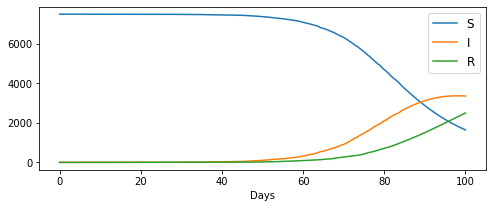

In [5]:
plt.figure( figsize=(8,3) )

S = np.sum(network_data[:,:,0], axis=1)
I = np.sum(network_data[:,:,1], axis=1)
R = np.sum(network_data[:,:,2], axis=1)
N = S + I + R

plt.plot(ts_days, S, label="S")
plt.plot(ts_days, I, label="I")
plt.plot(ts_days, R, label="R")

plt.legend(loc='upper right', fontsize=12)
plt.xlabel('Days')

Text(0.5, 0, 'Days')

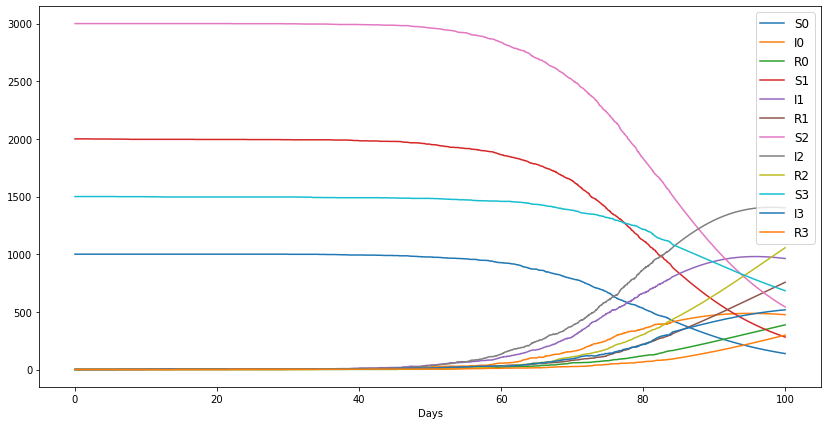

In [6]:
plt.figure( figsize=(14,7) )

S0 = network_data[:,0,0]
I0 = network_data[:,0,1]
R0 = network_data[:,0,2]
S1 = network_data[:,1,0]
I1 = network_data[:,1,1]
R1 = network_data[:,1,2]
S2 = network_data[:,2,0]
I2 = network_data[:,2,1]
R2 = network_data[:,2,2]
S3 = network_data[:,3,0]
I3 = network_data[:,3,1]
R3 = network_data[:,3,2]

plt.plot(ts_days, S0, label="S0")
plt.plot(ts_days, I0, label="I0")
plt.plot(ts_days, R0, label="R0")
plt.plot(ts_days, S1, label="S1")
plt.plot(ts_days, I1, label="I1")
plt.plot(ts_days, R1, label="R1")
plt.plot(ts_days, S2, label="S2")
plt.plot(ts_days, I2, label="I2")
plt.plot(ts_days, R2, label="R2")
plt.plot(ts_days, S3, label="S3")
plt.plot(ts_days, I3, label="I3")
plt.plot(ts_days, R3, label="R3")

plt.legend(loc='upper right', fontsize=12)
plt.xlabel('Days')